### Tìm tham số tối ưu cho cây quyết định bằng GridSearchCV và vẽ biểu đồ đánh giá mô hình với các tham số khác nhau

In [2]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high res figures
import graphviz #to visualize decision trees

### Nạp dữ liệu vào bộ nhớ, phân tích và loại bỏ những features không liên quan đến bài toán cần giải
quyết

In [3]:
df = pd.read_csv('dataset/default_of_credit_card_clients.csv') #Load the cleaned data
features_response = df.columns.tolist() #Get a list of column names
#Make a list of columns to remove that aren't features or the response
#variable
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3',\
'PAY_4', 'PAY_5', 'PAY_6',\
'EDUCATION_CAT', 'graduate school',\
'high school', 'none',\
'others', 'university']
features_response = [item for item in features_response if item not
in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

### Chuẩn bị dữ liệu cho tập train và tập test

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import tree
#Split the data into training and testing sets using the same random seed
X_train, X_test, y_train, y_test = \
train_test_split(df[features_response[:-1]].values,
df['default payment next month'].values,
test_size=0.2, random_state=24)

### Tạo cây quyết định và xác định các giá trị tham số có thể chọn để tìm tham số tối ưu

In [5]:
from sklearn.model_selection import GridSearchCV
params = {'max_depth':[1, 2, 4, 6, 8, 10, 12]} #parameters
dt = tree.DecisionTreeClassifier() #tree modal
cv = GridSearchCV(dt, param_grid=params, scoring='roc_auc',
n_jobs=None, refit=True, cv=4, verbose=1,
error_score=np.nan,
return_train_score=True) # cv is the best model.
cv.fit(X_train, y_train)

Fitting 4 folds for each of 7 candidates, totalling 28 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 4, 6, 8, 10, 12]},
             return_train_score=True, scoring='roc_auc', verbose=1)

### Vẽ biểu đồ đánh giá mô hình với các tham số chiều sâu của cây khác nhau

Text(0, 0.5, 'ROC AUC')

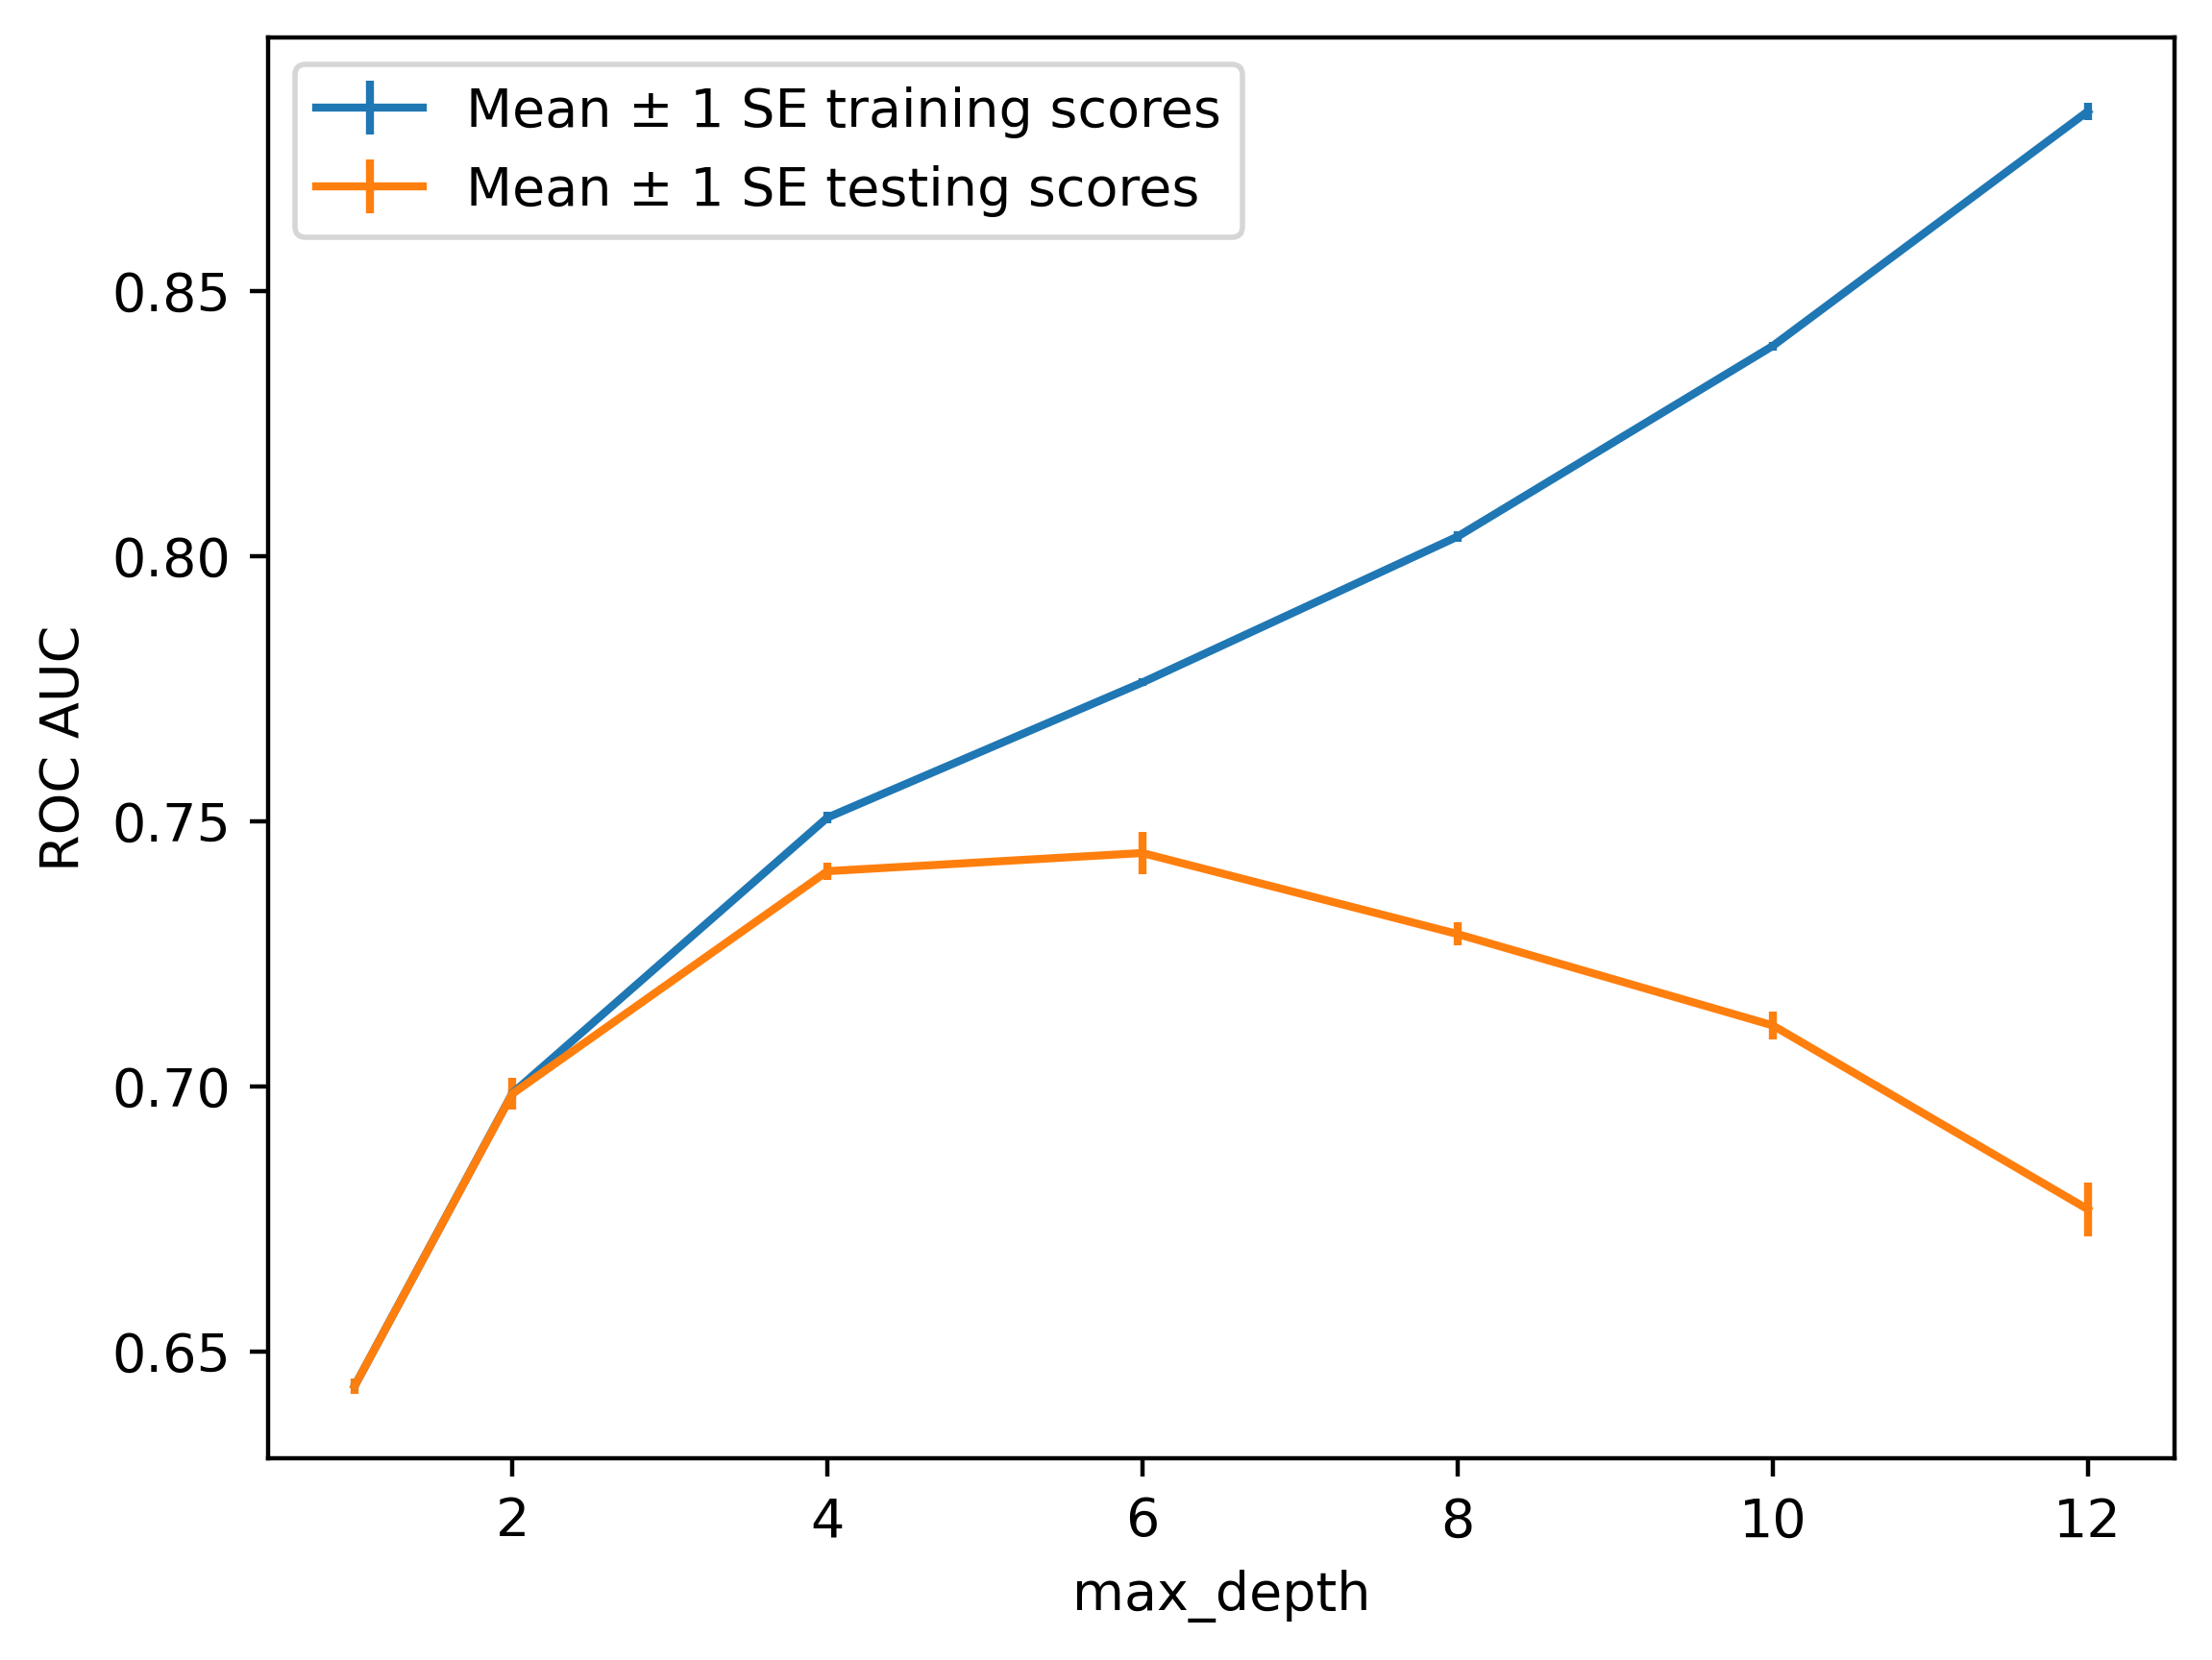

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Chuyển kết quả GridSearchCV thành DataFrame để dễ xem
cv_results_df = pd.DataFrame(cv.cv_results_)

# Xem tất cả các cột trong DataFrame (thông tin train/test score, params, ...)
cv_results_df.columns

# Vẽ biểu đồ ROC AUC theo max_depth
ax = plt.axes()

# Vẽ điểm số trung bình trên tập train kèm sai số chuẩn
ax.errorbar(
    cv_results_df['param_max_depth'],             # trục x: các giá trị max_depth
    cv_results_df['mean_train_score'],           # trục y: ROC AUC trung bình trên train
    yerr=cv_results_df['std_train_score']/np.sqrt(4),  # sai số chuẩn (SE) = std/sqrt(cv)
    label='Mean ± 1 SE training scores'          # nhãn legend
)

# Vẽ điểm số trung bình trên tập test kèm sai số chuẩn
ax.errorbar(
    cv_results_df['param_max_depth'],             # trục x: các giá trị max_depth
    cv_results_df['mean_test_score'],            # trục y: ROC AUC trung bình trên validation
    yerr=cv_results_df['std_test_score']/np.sqrt(4),   # sai số chuẩn (SE) = std/sqrt(cv)
    label='Mean ± 1 SE testing scores'           # nhãn legend
)

# Hiển thị legend
ax.legend()

# Ghi nhãn trục x
plt.xlabel('max_depth')

# Ghi nhãn trục y
plt.ylabel('ROC AUC')

# Mục đích: biểu đồ này giúp trực quan hóa bias-variance theo độ sâu cây
# - Nếu train score cao nhưng test score thấp -> overfitting
# - Nếu cả train & test score thấp -> underfitting


In [9]:
# --- 9. Model tốt nhất ---
print("Best max_depth:", cv.best_params_)
print("Best ROC AUC on train:", cv.best_score_)

Best max_depth: {'max_depth': 6}
Best ROC AUC on train: 0.743960107705211
